In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



from sklearn.feature_selection import RFE
import statsmodels.formula.api as smf

In [39]:
#import cleaned
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.corr()["cast_total_facebook_likes"]

duration                     0.120861
director_facebook_likes      0.118631
actor_3_facebook_likes       0.489614
actor_1_facebook_likes       0.944793
gross                        0.235027
cast_total_facebook_likes    1.000000
facenumber_in_poster         0.080325
budget                       0.229990
title_year                   0.126692
actor_2_facebook_likes       0.642853
aspect_ratio                 0.068771
profit                       0.112756
gross_bin                    0.202274
action                       0.060068
adventure                    0.069411
animation                   -0.001456
biography                    0.020657
comedy                      -0.058486
crime                        0.027250
documentary                 -0.060688
drama                        0.001446
family                       0.001067
fantasy                      0.040547
history                     -0.018228
horror                      -0.066563
music                       -0.050122
musical     

We can see from above that facebook likes is extremely correlated with the number of facebook likes of actor 1 (0.932273), as well as actor 2 (0.706831), and actor 3(0.551871). This should be taken into account when making the model (interactions).

## Which combination of actors are most profitable?

In [5]:
df_people = df[["director_name", "director_facebook_likes",  "actor_1_name", "actor_1_facebook_likes","actor_2_name", "actor_2_facebook_likes", "actor_3_name","actor_3_facebook_likes", "cast_total_facebook_likes",  "profit"]]

In [6]:
yay = df_people.groupby(["director_name","actor_1_name", "actor_2_name", "actor_3_name"])[["profit"]].agg("mean").sort_values(by = "profit", ascending=False)
yay

,,,,profit
director_name,actor_1_name,actor_2_name,actor_3_name,
James Cameron,CCH Pounder,Joel David Moore,Wes Studi,523505847.0
Colin Trevorrow,Bryce Dallas Howard,Judy Greer,Omar Sy,502177271.0
James Cameron,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,458672302.0
George Lucas,Harrison Ford,Peter Cushing,Kenny Baker,449935665.0
Steven Spielberg,Henry Thomas,Dee Wallace,Peter Coyote,424449459.0
...,...,...,...,...
Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,-190641321.0
Tony Jaa,Nirut Sirichanya,Petchtai Wongkamlao,Sarunyu Wongkrachang,-299897945.0
Luc Besson,Paul Brooke,David Bailie,Rab Affleck,-375868702.0


In [7]:
yay[:3]

,,,,profit
director_name,actor_1_name,actor_2_name,actor_3_name,
James Cameron,CCH Pounder,Joel David Moore,Wes Studi,523505847.0
Colin Trevorrow,Bryce Dallas Howard,Judy Greer,Omar Sy,502177271.0
James Cameron,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,458672302.0


In [8]:
df_people.groupby(["director_name","actor_1_name", "actor_2_name", "actor_3_name"]).agg("count")

,,,,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,profit
director_name,actor_1_name,actor_2_name,actor_3_name,,,,,,
Aaron Schneider,Bill Murray,Robert Duvall,Bill Cobbs,1,1,1,1,1,1
Aaron Seltzer,Alyson Hannigan,Carmen Electra,Fred Willard,1,1,1,1,1,1
Abel Ferrara,Isabella Rossellini,Vincent Gallo,Gretchen Mol,1,1,1,1,1,1
Adam Goldberg,Judy Greer,Marisa Coughlan,Nicky Katt,1,1,1,1,1,1
Adam Marcus,Kane Hodder,Leslie Jordan,Erin Gray,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
Zack Snyder,Ty Burrell,Kevin Zegers,Mekhi Phifer,2,2,2,2,2,2
Zak Penn,Zak Penn,Gabriel Beristain,John Bailey,1,1,1,1,1,1
Zal Batmanglij,Alexander Skarsgård,Julia Ormond,Jason Ritter,1,1,1,1,1,1


Most profitable combination of director and actors is James Cameron, CCH Pounder, Joel David Moore, and Wes Studi.

In [9]:
director = df_people.groupby(["director_name"])[["profit"]].agg("mean").sort_values(by = "profit", ascending=False).reset_index()
director

,director_name,profit
0,Tim Miller,305024263.0
1,George Lucas,277328296.0
2,Richard Marquand,276625409.0
3,Kyle Balda,262029560.0
4,Colin Trevorrow,252717531.5
...,...,...
1650,Hironobu Sakaguchi,-104868170.0
1651,Carl Rinsch,-136702695.0
1652,Prachya Pinkaew,-188094481.0
1653,Tony Jaa,-299897945.0


In [10]:
actor_1 = df_people.groupby(["actor_1_name"])[["profit"]].agg("mean").sort_values(by = "profit", ascending=False).reset_index()
actor_1

,actor_1_name,profit
0,Wayne Knight,293784000.0
1,Rupert Everett,286471036.0
2,Catherine Dyer,226950375.0
3,Henry Thomas,211314551.0
4,Kathleen Freeman,207652016.0
...,...,...
1418,Jon Foo,-188094481.0
1419,Nirut Sirichanya,-299897945.0
1420,Takeshi Kaneshiro,-320981981.5
1421,Paul Brooke,-375868702.0


In [11]:
actor_2 = df_people.groupby(["actor_2_name"])[["profit"]].agg("mean").sort_values(by = "profit", ascending=False).reset_index()
actor_2


,actor_2_name,profit
0,Peter Cushing,4.499357e+08
1,Robert Downey Jr.,3.385169e+08
2,Ed Skrein,3.050243e+08
3,Leonard Roberts,2.913236e+08
4,Jennifer Saunders,2.864710e+08
...,...,...
2177,Eddie Deezen,-1.643346e+08
2178,Nathan Jones,-1.880945e+08
2179,Petchtai Wongkamlao,-2.998979e+08
2180,David Bailie,-3.758687e+08


In [12]:
actor_3 = df_people.groupby(["actor_3_name"])[["profit"]].agg("mean").sort_values(by = "profit", ascending=False).reset_index()
actor_3

,actor_3_name,profit
0,Omar Sy,502177271.0
1,Gloria Stuart,458672302.0
2,Niketa Calame,377783777.0
3,Ian McDiarmid,359544677.0
4,Anthony Reynolds,329999255.0
...,...,...
2576,Polly Walker,-190641321.0
2577,Sarunyu Wongkrachang,-299897945.0
2578,Rab Affleck,-375868702.0
2579,Mai Charoenpura,-399545745.0


In [40]:
df["director_name"].value_counts()

Steven Spielberg    25
Woody Allen         19
Clint Eastwood      19
Ridley Scott        17
Martin Scorsese     16
                    ..
Joseph Ruben         1
Albert Brooks        1
Steve Gomer          1
RZA                  1
Shane Carruth        1
Name: director_name, Length: 1655, dtype: int64

In [44]:
sum(df["director_name"].value_counts() > 1)

714

In [48]:
df["actor_1_name"].value_counts()

Robert De Niro       42
Johnny Depp          39
J.K. Simmons         31
Nicolas Cage         31
Denzel Washington    30
                     ..
Bunta Sugawara        1
Katrina Bowden        1
Darci Kistler         1
Tony Nappo            1
John August           1
Name: actor_1_name, Length: 1423, dtype: int64

In [45]:
sum(df["actor_1_name"].value_counts() > 1)

557

In [49]:
df["actor_2_name"].value_counts()

Morgan Freeman      20
Brad Pitt           14
Charlize Theron     14
James Franco        11
Meryl Streep        10
                    ..
Oleg Taktarov        1
Richard Sammel       1
Sean Young           1
Danny Masterson      1
Brian Herzlinger     1
Name: actor_2_name, Length: 2182, dtype: int64

In [46]:
sum(df["actor_2_name"].value_counts() > 1)

727

In [50]:
df["actor_3_name"].value_counts()

Steve Coogan         8
Robert Duvall        7
Kirsten Dunst        7
Ben Mendelsohn       7
Anne Hathaway        7
                    ..
Bonnie Somerville    1
Candice Bergen       1
Maria Thayer         1
Tracie Thoms         1
Jon Gunn             1
Name: actor_3_name, Length: 2581, dtype: int64

In [51]:
sum(df["actor_3_name"].value_counts() > 1)

700

In [35]:
len(director)

1655

[Text(0.5, 0, 'Director Names'), Text(0, 0.5, 'Average Profit')]

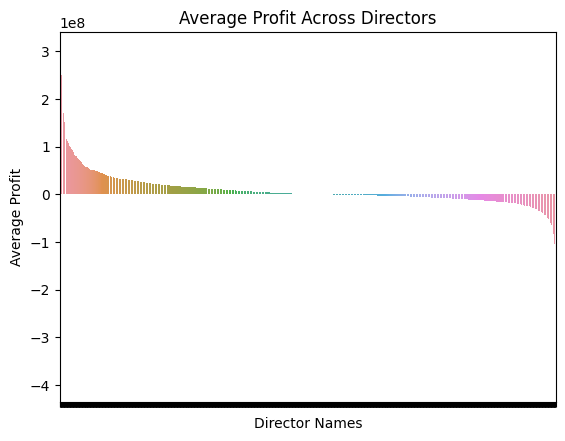

In [30]:
ax = sns.barplot(data = director, x = "director_name", y = "profit")
ax.set(xticklabels=[])
ax.set(title= "Average Profit Across Directors")
ax.set(xlabel='Director Names', ylabel='Average Profit')

[Text(0.5, 0, 'Actor_1 Names'), Text(0, 0.5, 'Average Profit')]

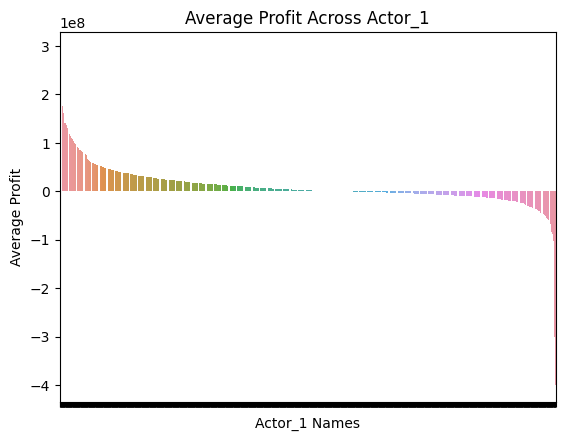

In [31]:
ax = sns.barplot(data = actor_1, x = "actor_1_name", y = "profit")
ax.set(xticklabels=[])
ax.set(title= "Average Profit Across Actor_1")
ax.set(xlabel='Actor_1 Names', ylabel='Average Profit')

[Text(0.5, 0, 'Actor_2 Names'), Text(0, 0.5, 'Average Profit')]

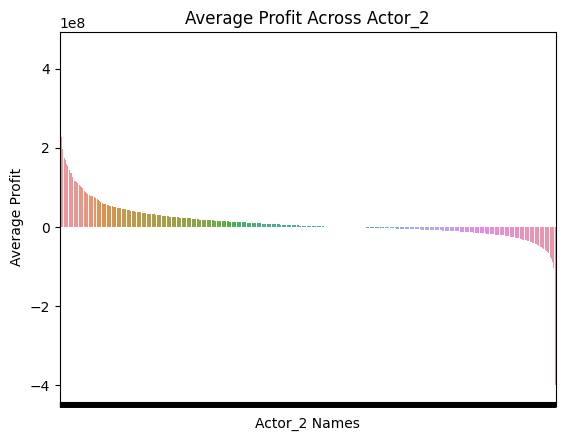

In [32]:
ax = sns.barplot(data = actor_2, x = "actor_2_name", y = "profit")
ax.set(xticklabels=[])
ax.set(title= "Average Profit Across Actor_2")
ax.set(xlabel='Actor_2 Names', ylabel='Average Profit')

[Text(0.5, 0, 'Actor_3 Names'), Text(0, 0.5, 'Average Profit')]

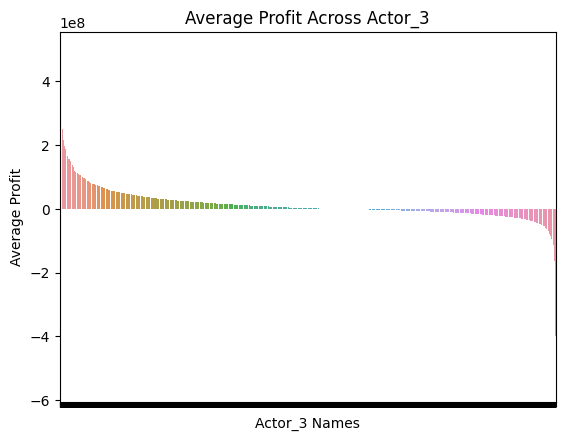

In [33]:
ax = sns.barplot(data = actor_3, x = "actor_3_name", y = "profit")
ax.set(xticklabels=[])
ax.set(title= "Average Profit Across Actor_3")
ax.set(xlabel='Actor_3 Names', ylabel='Average Profit')

In [ ]:
director_high = [x for x in director['director_name'].iloc[:(round(len(director)/2))]]
director_high

['Tim Miller',
 'Colin Trevorrow',
 'George Lucas',
 'Richard Marquand',
 'Kyle Balda',
 'Chris Buck',
 'Yarrow Cheney',
 'Pierre Coffin',
 'Joss Whedon',
 'Lee Unkrich',
 'Roger Allers',
 'William Cottrell',
 'James Cameron',
 'Peter Faiman',
 'Irvin Kershner',
 'Francis Lawrence',
 'Pete Docter',
 'Andrew Adamson',
 'Daniel Myrick',
 'Sam Taylor-Johnson',
 'Phil Lord',
 'George Roy Hill',
 'David Slade',
 'Robert Wise',
 'Joel Zwick',
 'Josh Boone',
 'Peter Farrelly',
 'Christopher Nolan',
 'David Silverman',
 'Oren Peli',
 'Victor Fleming',
 'Gary Ross',
 'Elizabeth Banks',
 'Jay Roach',
 'Penelope Spheeris',
 'Leonard Nimoy',
 'Shane Black',
 'Randal Kleiser',
 'Jon Favreau',
 'Robert Stevenson',
 'John Lasseter',
 'Michael Sucsy',
 'John Cornell',
 'Steven Spielberg',
 'Rawson Marshall Thurber',
 'John G. Avildsen',
 'Paul Tibbitt',
 'Chris Columbus',
 'Mike Gabriel',
 'Chris Miller',
 'Jeannot Szwarc',
 'Jeff Tremaine',
 'Tod Williams',
 'Norman Ferguson',
 'P.J. Hogan',
 'Jim Ab

In [ ]:
director_low = [x for x in director['director_name'].iloc[(round(len(director)/2)):len(director)]]

In [ ]:
actor_1_high = [x for x in actor_1['actor_1_name'].iloc[:(round(len(actor_1)/2))]]

In [ ]:
actor_1_low = [x for x in actor_1['actor_1_name'].iloc[(round(len(actor_1)/2)):len(actor_1)]]

In [ ]:
actor_2_high = [x for x in actor_2['actor_2_name'].iloc[:(round(len(actor_2)/2))]]

In [ ]:
actor_2_low = [x for x in actor_2['actor_2_name'].iloc[(round(len(actor_2)/2)):len(actor_2)]]

In [ ]:
actor_3_high = [x for x in actor_3['actor_3_name'].iloc[:(round(len(actor_3)/2))]]

In [ ]:
actor_3_low = [x for x in actor_3['actor_3_name'].iloc[(round(len(actor_3)/2)):len(actor_3)]]

In [ ]:
df["director_high"] = [1 if director_high.count(x) > 0 else 0 for x in df["director_name"]]
df["director_low"] = [1 if director_low.count(x) > 0 else 0 for x in df["director_name"]]


In [ ]:
df["actor_1_high"] = [1 if actor_1_high.count(x) > 0 else 0 for x in df["actor_1_name"]]
df["actor_1_low"] = [1 if actor_1_low.count(x) > 0 else 0 for x in df["actor_1_name"]]

In [ ]:
df["actor_2_high"] = [1 if actor_2_high.count(x) > 0 else 0 for x in df["actor_2_name"]]
df["actor_2_low"] = [1 if actor_2_low.count(x) > 0 else 0 for x in df["actor_2_name"]]

In [ ]:
df["actor_3_high"] = [1 if actor_3_high.count(x) > 0 else 0 for x in df["actor_3_name"]]
df["actor_3_low"] = [1 if actor_3_low.count(x) > 0 else 0 for x in df["actor_3_name"]]

In [ ]:
df_actors = df.copy()

In [ ]:
train_data, test_data = train_test_split(df_actors, test_size=0.2, random_state=42)

# Save the training and testing data as CSV files
train_data.to_csv('team_train_X.csv', index=False)
test_data.to_csv('team_test_X.csv', index=False)

In [ ]:
team_train_X = pd.read_csv('team_train_X.csv')
team_test_X = pd.read_csv('team_test_X.csv')


## Making a regression model by looking at whether the movies have a profitable team

In [ ]:
#Using the ols function to create an ols object. 'ols' stands for 'Ordinary least squares'
ols_object = smf.ols(formula = 'profit~director_high+director_low+actor_1_high+actor_1_low+actor_2_high+actor_2_low+actor_3_high+actor_3_low', data = team_train_X)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     43.40
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.08e-60
Time:                        15:39:09   Log-Likelihood:            -1.8649e+05
No. Observations:                8989   AIC:                         3.730e+05
Df Residuals:                    8981   BIC:                         3.731e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.345e+20   9.05e+20     -0.149      0.882   -1.91e+21    1.64e+21
director_high -3.875e+18   4.01e+20     -0.010      0.992    -7.9e+20    7.82e+20
director_low  -3.875e+18   4.01e+20     -0.010      0.992    -7.9e+20    7.82e+20
actor_1_high   3.567e+19    1.6e+20      0.222      0.824   -2.79e+20     3.5e+20
actor_1_low    3.567e+19    1.6e+20      0.222      0.824   -2.79e+20     3.5e+20
actor_2_high   1.643e+19   2.88e+20      0.057      0.955   -5.49e+20    5.82e+20
actor_2_low    1.643e+19   2.88e+20      0.057      0.955   -5.49e+20    5.82e+20
actor_3_high   8.631e+19   5.65e+20      0.153      0.879   -1.02e+21    1.19e+21
actor_3_low    8.631e+19   5.65e+20      0.153      0.879   -1.02e+21    1.19e+21
==============================================================================
Omnibus:                    26356.347   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1426846360.926
Skew:                         -41.133   Prob(JB):                         0.00
Kurtosis:                    1953.080   Cond. No.                     8.08e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.22e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""